<a href="https://colab.research.google.com/github/leolabs-id/Uji_Hipotesis_Statistik/blob/main/Tugas4_Uji_Hipotesis_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi seaborn
sns.set_style('whitegrid')

In [3]:
# Langkah a: Menyambungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Langkah b: Mendefinisikan lokasi file dan membacanya ke DataFrame
file_path = '/content/drive/MyDrive/Colab Notebooks/cust_seg.csv'
df = pd.read_csv(file_path)

In [5]:
# Langkah c: Menampilkan 5 baris pertama untuk verifikasi
print(df.head())

   custid  sex  AqChannel  region  Marital_status  segment  pre_usage  \
0      70    0          4       1               1        1         57   
1     121    1          4       2               1        3         68   
2      86    0          4       3               1        1         44   
3     141    0          4       3               1        3         63   
4     172    0          4       2               1        2         47   

   Post_usage_1month  Latest_mon_usage  post_usage_2ndmonth  
0                 52              49.2                 57.2  
1                 59              63.6                 64.9  
2                 33              64.8                 36.3  
3                 44              56.4                 48.4  
4                 52              68.4                 57.2  


In [6]:
# Menampilkan informasi ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [7]:
#Menampilkan statistik deskriptif data numerik
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [8]:
#Menampilkan jumlah nilai unik dari kolom non-numerik
df.nunique()

,0
custid,200
sex,2
AqChannel,4
region,3
Marital_status,2
segment,3
pre_usage,30
Post_usage_1month,29
Latest_mon_usage,40
post_usage_2ndmonth,29


In [9]:
# Menganalisis Distribusi Gender dan Status Pernikahan
print("Distribusi Frekuensi Jenis Kelamin (sex):")
print(df['sex'].value_counts())
print("\nDistribusi Frekuensi Status Pernikahan (Marital_status):")
print(df['Marital_status'].value_counts())

# Tambahan: Mengetahui persentase (Normalisasi)
print("\nDistribusi Frekuensi Segment (Persentase):")
print(df['segment'].value_counts(normalize=True) * 100)

Distribusi Frekuensi Jenis Kelamin (sex):
sex
1    109
0     91
Name: count, dtype: int64

Distribusi Frekuensi Status Pernikahan (Marital_status):
Marital_status
1    168
2     32
Name: count, dtype: int64

Distribusi Frekuensi Segment (Persentase):
segment
2    52.5
3    25.0
1    22.5
Name: proportion, dtype: float64


In [10]:
# Analisis Rata-rata Penggunaan Berdasarkan Segmentasi Pelanggan
# Melihat rata-rata 'pre_usage' per 'segment'
print("\nRata-rata Penggunaan Awal (pre_usage) berdasarkan Segment:")
print(df.groupby('segment')['pre_usage'].mean().sort_values(ascending=False))


Rata-rata Penggunaan Awal (pre_usage) berdasarkan Segment:
segment
2    56.161905
1    49.755556
3    46.200000
Name: pre_usage, dtype: float64


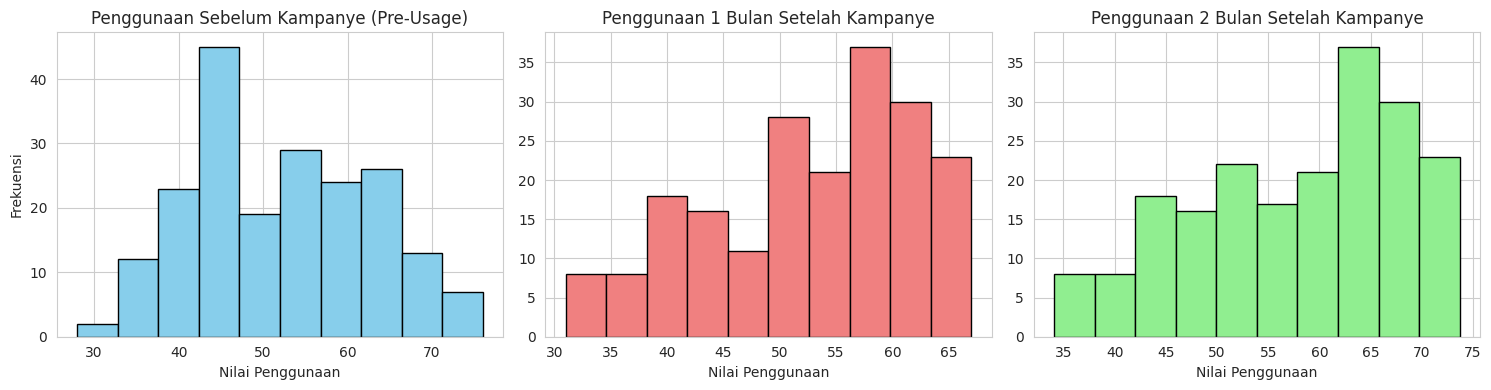

In [11]:
# Soal 1b: Membuat Histogram Menggunakan Matplotlib (plt) Saja

# 1. Mengatur Ukuran Figure
plt.figure(figsize=(15, 4)) # Membuat kanvas dengan ukuran 15x4

# 2. Histogram Penggunaan Sebelum Kampanye
plt.subplot(1, 3, 1) # Membuat subplot di posisi 1 dari 3
plt.hist(df['pre_usage'], bins=10, edgecolor='black', color='skyblue')
plt.title('Penggunaan Sebelum Kampanye (Pre-Usage)')
plt.xlabel('Nilai Penggunaan')
plt.ylabel('Frekuensi')

# 3. Histogram Penggunaan 1 Bulan Setelah Kampanye
plt.subplot(1, 3, 2) # Membuat subplot di posisi 2 dari 3
plt.hist(df['Post_usage_1month'], bins=10, edgecolor='black', color='lightcoral')
plt.title('Penggunaan 1 Bulan Setelah Kampanye')
plt.xlabel('Nilai Penggunaan')

# 4. Histogram Penggunaan 2 Bulan Setelah Kampanye
plt.subplot(1, 3, 3) # Membuat subplot di posisi 3 dari 3
plt.hist(df['post_usage_2ndmonth'], bins=10, edgecolor='black', color='lightgreen')
plt.title('Penggunaan 2 Bulan Setelah Kampanye')
plt.xlabel('Nilai Penggunaan')

# 5. Menampilkan dan merapikan plot
plt.tight_layout() # Merapikan tata letak agar judul tidak bertabrakan
plt.show() # Menampilkan plot

In [13]:
# Soal 2a: Uji Hipotesis Paired T-Test (Pre-usage vs. Post-usage_1month)

# 1. Mendefinisikan data yang akan dibandingkan
data_sebelum = df['pre_usage']
data_sesudah_1bulan = df['Post_usage_1month']

# 2. Menjalankan Uji-T Berpasangan
t_statistic, p_value = stats.ttest_rel(data_sesudah_1bulan, data_sebelum)

# 3. Menampilkan Hasil
print(f"Hasil Uji-T Berpasangan (Pre vs 1 Bulan):")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Menentukan nilai Alpha (tingkat signifikansi)
alpha = 0.05

# 5. Membuat Kesimpulan Otomatis (opsional, tapi disarankan)
if p_value < alpha:
    print(f"\nKesimpulan (alpha={alpha}): Tolak H0.")
    print("Ada perbedaan signifikan pada penggunaan kartu kredit (Kampanye berhasil atau gagal total)")
else:
    print(f"\nKesimpulan (alpha={alpha}): Gagal Tolak H0.")
    print("Tidak ada perbedaan signifikan pada penggunaan kartu kredit (Kampanye belum berhasil)")

Hasil Uji-T Berpasangan (Pre vs 1 Bulan):
T-statistic: 0.8673
P-value: 0.3868

Kesimpulan (alpha=0.05): Gagal Tolak H0.
Tidak ada perbedaan signifikan pada penggunaan kartu kredit (Kampanye belum berhasil)


In [14]:
# Soal 2b: Uji Hipotesis Paired T-Test (Pre-usage vs. post_usage_2ndmonth)

# 1. Mendefinisikan data yang akan dibandingkan
data_sebelum = df['pre_usage']
data_sesudah_2bulan = df['post_usage_2ndmonth']

# 2. Menjalankan Uji-T Berpasangan
# Kita membandingkan penggunaan 2 bulan (sesudah) terhadap penggunaan awal (sebelum)
t_statistic, p_value = stats.ttest_rel(data_sesudah_2bulan, data_sebelum)

# 3. Menampilkan Hasil
print(f"Hasil Uji-T Berpasangan (Pre vs 2 Bulan):")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Menentukan nilai Alpha (tingkat signifikansi)
alpha = 0.05

# 5. Membuat Kesimpulan Otomatis
if p_value < alpha:
    print(f"\nKesimpulan (alpha={alpha}): Tolak H0.")
    print("Ada perbedaan signifikan pada penggunaan kartu kredit (Kampanye berhasil)")
else:
    print(f"\nKesimpulan (alpha={alpha}): Gagal Tolak H0.")
    print("Tidak ada perbedaan signifikan pada penggunaan kartu kredit (Kampanye belum berhasil)")

Hasil Uji-T Berpasangan (Pre vs 2 Bulan):
T-statistic: 8.8668
P-value: 0.0000

Kesimpulan (alpha=0.05): Tolak H0.
Ada perbedaan signifikan pada penggunaan kartu kredit (Kampanye berhasil)


### Kesimpulan Soal Nomor 2:
2a. Kampanye belum berhasil setelah 1 bulan. Peningkatan rata-rata penggunaan ($52.23 \to 52.77$) tidak signifikan secara statistik.

2b. Kampanye berhasil setelah 2 bulan. Peningkatan rata-rata penggunaan ($52.23 \to 58.05$) sangat signifikan secara statistik.

In [15]:
# Soal 3a: Uji Hipotesis Independent T-Test (Laki-laki vs Perempuan, 1 Bulan Setelah Kampanye)

# 1. Pemfilteran Data (Slicing)
# sex = 0 adalah Laki-laki
penggunaan_laki_1bulan = df[df['sex'] == 0]['Post_usage_1month']
# sex = 1 adalah Perempuan
penggunaan_perempuan_1bulan = df[df['sex'] == 1]['Post_usage_1month']

# 2. Menjalankan Uji-T Independen
# default ttest_ind mengasumsikan varians kedua kelompok sama (equal_var=True)
t_statistic, p_value = stats.ttest_ind(penggunaan_laki_1bulan, penggunaan_perempuan_1bulan)

# 3. Menampilkan Hasil
print(f"Hasil Uji-T Independen (Laki-laki vs Perempuan, 1 Bulan):")
print(f"Rata-rata Laki-laki: {penggunaan_laki_1bulan.mean():.2f}")
print(f"Rata-rata Perempuan: {penggunaan_perempuan_1bulan.mean():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Menentukan nilai Alpha
alpha = 0.05

# 5. Membuat Kesimpulan Otomatis
if p_value < alpha:
    print(f"\nKesimpulan (alpha={alpha}): Tolak H0.")
    print("Ada perbedaan signifikan penggunaan kartu kredit antar gender.")
else:
    print(f"\nKesimpulan (alpha={alpha}): Gagal Tolak H0.")
    print("Tidak ada perbedaan signifikan penggunaan kartu kredit antar gender.")

Hasil Uji-T Independen (Laki-laki vs Perempuan, 1 Bulan):
Rata-rata Laki-laki: 50.12
Rata-rata Perempuan: 54.99
T-statistic: -3.7341
P-value: 0.0002

Kesimpulan (alpha=0.05): Tolak H0.
Ada perbedaan signifikan penggunaan kartu kredit antar gender.


In [16]:
# Soal 3b: Uji Hipotesis Independent T-Test (Laki-laki vs Perempuan, 2 Bulan Setelah Kampanye)

# 1. Pemfilteran Data (Slicing)
# sex = 0 adalah Laki-laki
penggunaan_laki_2bulan = df[df['sex'] == 0]['post_usage_2ndmonth']
# sex = 1 adalah Perempuan
penggunaan_perempuan_2bulan = df[df['sex'] == 1]['post_usage_2ndmonth']

# 2. Menjalankan Uji-T Independen
# default ttest_ind mengasumsikan varians kedua kelompok sama (equal_var=True)
t_statistic, p_value = stats.ttest_ind(penggunaan_laki_2bulan, penggunaan_perempuan_2bulan)

# 3. Menampilkan Hasil
print(f"Hasil Uji-T Independen (Laki-laki vs Perempuan, 2 Bulan):")
print(f"Rata-rata Laki-laki: {penggunaan_laki_2bulan.mean():.2f}")
print(f"Rata-rata Perempuan: {penggunaan_perempuan_2bulan.mean():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Menentukan nilai Alpha
alpha = 0.05

# 5. Mebuat Kesimpulan Otomatis
if p_value < alpha:
    print(f"\nKesimpulan (alpha={alpha}): Tolak H0.")
    print("Ada perbedaan signifikan penggunaan kartu kredit antar gender.")
else:
    print(f"\nKesimpulan (alpha={alpha}): Gagal Tolak H0.")
    print("Tidak ada perbedaan signifikan penggunaan kartu kredit antar gender.")

Hasil Uji-T Independen (Laki-laki vs Perempuan, 2 Bulan):
Rata-rata Laki-laki: 55.13
Rata-rata Perempuan: 60.49
T-statistic: -3.7341
P-value: 0.0002

Kesimpulan (alpha=0.05): Tolak H0.
Ada perbedaan signifikan penggunaan kartu kredit antar gender.


### Kesimpulan Soal No 3:
3a. Ada perbedaan signifikan. Perempuan menunjukkan respons penggunaan yang lebih tinggi dibandingkan laki-laki setelah 1 bulan.

3b. Ada perbedaan signifikan. Perempuan terus mempertahankan dan meningkatkan penggunaan lebih tinggi secara signifikan dibandingkan laki-laki hingga bulan kedua.